In [5]:
#%watermark -a "Chibuzor Enyioko" -d -t -v -p numpy,pandas,matplotlib

# Project 3: Unsupervised Learning

This project explores unsupervised learning methods through clustering. 

In [6]:
import numpy as np
import pandas as pd
import matplotlib as plt
import sklearn as sk

## Part 1: Cleaning the data sets

In [7]:
# importing the data sets

hospital_data = pd.read_csv('hospital.csv')

# selecting numeric columns only and dropping identifier columns for hospital data
hospital_data_x = hospital_data.select_dtypes(exclude=['object'])
hospital_data_x = hospital_data_x.drop(columns=['encounter_id', 'patient_nbr'])

## Part 2: Questions
### Mice Data set

1. Run k-Means on the dataset and identify the best number (between 2 and 8)
of clusters (hint – Silhouette Scores on the right side of the k-Means box). Report this
number and its silhouette score. For non-technical track students – you may see an error
regarding the max number of allowed rows for the Hospital dataset. Report the scores that
you see regardless.


For n_clusters = 2, the average silhouette_score is : 0.3847220709486524
For n_clusters = 3, the average silhouette_score is : 0.3371431493012246
For n_clusters = 4, the average silhouette_score is : 0.2674147941122417
For n_clusters = 5, the average silhouette_score is : 0.2761777181524227
For n_clusters = 6, the average silhouette_score is : 0.2456253603151909
For n_clusters = 7, the average silhouette_score is : 0.23549174115542945
For n_clusters = 8, the average silhouette_score is : 0.21453952744106178


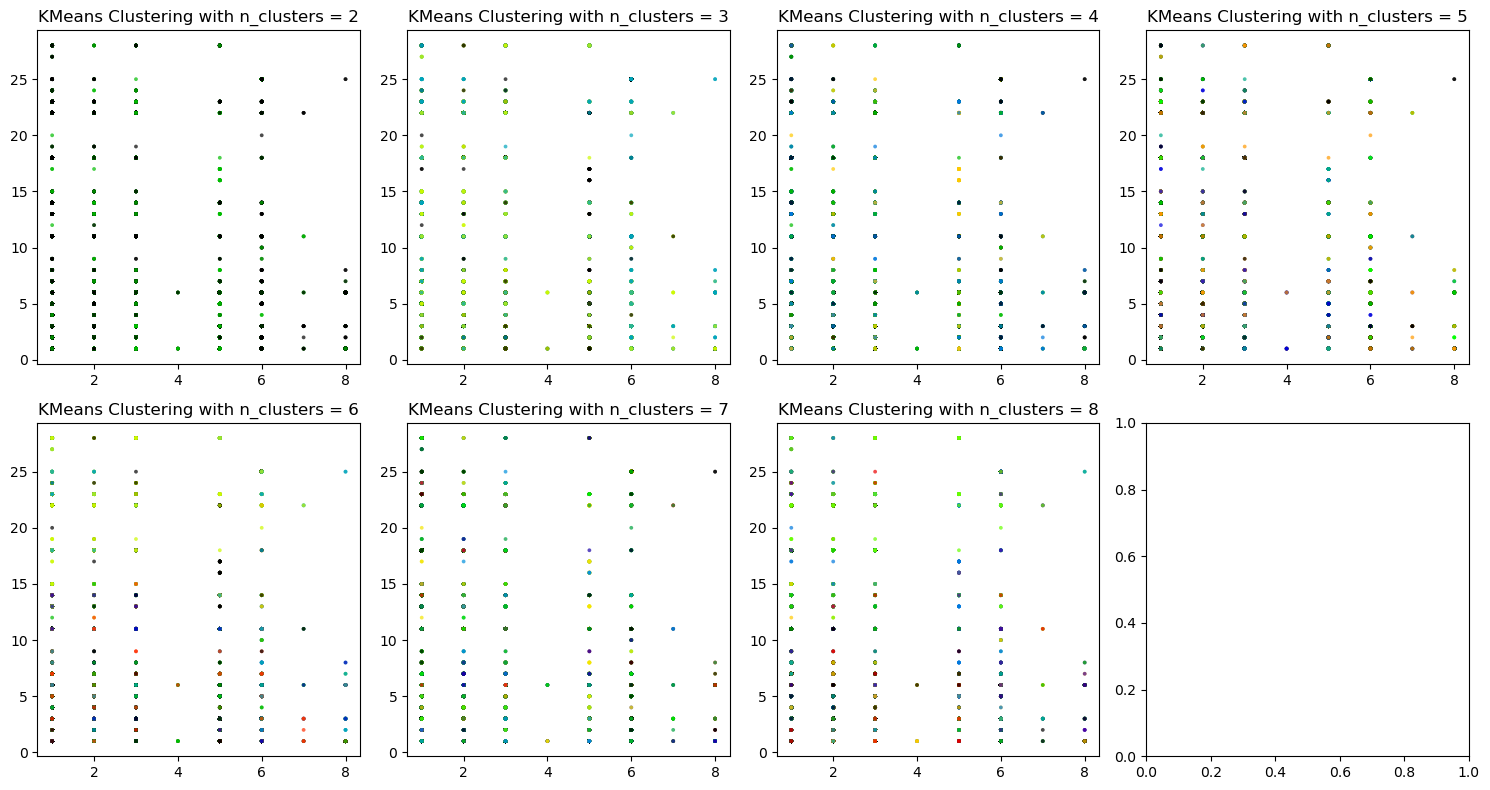

In [8]:
# kmeans clustering on hospital data set
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = range(2, 9)
for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    cluster_labels = kmeans.fit_predict(hospital_data_x)
    silhouette_avg = silhouette_score(hospital_data_x, cluster_labels)
    print(f'For n_clusters = {n}, the average silhouette_score is : {silhouette_avg}')

# plot clusters
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i, n in enumerate(n_clusters):
    kmeans = KMeans(n_clusters=n)
    cluster_labels = kmeans.fit_predict(hospital_data_x)
    
    # scatter plot for all clusters

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
    axes[i].scatter(hospital_data_x.iloc[:, 0], hospital_data_x.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    axes[i].set_title(f'KMeans Clustering with n_clusters = {n}')
plt.tight_layout()
plt.show()

3. Pick the best 5 features by “Information Gain”, and attempt Q1 again. Use the
Rank widget.


In [9]:
from sklearn.feature_selection import mutual_info_regression

# Calculate mutual information for each feature
mi_scores = mutual_info_regression(hospital_data_x, cluster_labels)
mi_df = pd.DataFrame({'feature': hospital_data_x.columns, 'mi_score': mi_scores})
mi_df = mi_df.sort_values(by='mi_score', ascending=False)
print(mi_df.head(5))

                    feature  mi_score
4        num_lab_procedures  1.421950
6           num_medications  0.289232
1  discharge_disposition_id  0.180756
3          time_in_hospital  0.117883
2       admission_source_id  0.105683


In [10]:
# selecting the top 5 features based on mutual information scores
hospital_data_subset = hospital_data_x[[]]

# kmeans clustering on mice data subset
n_clusters = range(2, 9)
for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    cluster_labels = kmeans.fit_predict(hospital_data_subset)
    silhouette_avg = silhouette_score(hospital_data_subset, cluster_labels)
    print(f'For n_clusters = {n}, the average silhouette_score is : {silhouette_avg}')

# plot clusters
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i, n in enumerate(n_clusters):
    kmeans = KMeans(n_clusters=n)
    cluster_labels = kmeans.fit_predict(hospital_data_subset)
    
    # scatter plot for all clusters

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
    axes[i].scatter(hospital_data_subset.iloc[:, 0], hospital_data_subset.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    axes[i].set_title(f'KMeans Clustering with n_clusters = {n}')
    
plt.tight_layout()
plt.show()


ValueError: at least one array or dtype is required

4. [Extra Credit: 10 points] Try to maximize performance using a supervised method.
Points will be awarded based on the relative rank of students who participate in the extra credit. Include the workbook in your submission.
